In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
%cd Z:\PPMI_Data\Excel_Data
df = pd.read_csv ("beta_post_Funnorm_PPMI_EPICn524final030618.csv")
df = df.round(decimals = 4)
df.head(2)


Z:\PPMI_Data\Excel_Data


,200973410159_R03C01,200991620021_R01C01,200991620021_R03C01,200989060105_R03C01,200989060135_R07C01,200989060162_R04C01,200973410167_R04C01,200973410143_R01C01,200973410143_R06C01,200973410167_R05C01,...,200989060089_R02C01,200989060089_R01C01,200989060089_R04C01,200973410143_R08C01,200973410143_R07C01,200989060089_R03C01,200989060150_R04C01,200989060150_R05C01,200989060150_R06C01,200991620049_R08C01
cg14817997,0.8340,0.8492,0.7730,0.8853,0.7725,0.7564,0.7198,0.7759,0.7689,0.7594,...,0.7882,0.8389,0.8453,0.7704,0.8529,0.7838,0.8069,0.8757,0.6613,0.7379
cg26928153,0.9456,0.9485,0.9622,0.9440,0.9263,0.9561,0.9130,0.9560,0.9571,0.8976,...,0.9512,0.9590,0.9571,0.9547,0.9478,0.9581,0.9480,0.9424,0.9550,0.9463


In [3]:
df.index.name ='CpG'
df.reset_index(inplace=True)
df.head(2)

,CpG,200973410159_R03C01,200991620021_R01C01,200991620021_R03C01,200989060105_R03C01,200989060135_R07C01,200989060162_R04C01,200973410167_R04C01,200973410143_R01C01,200973410143_R06C01,...,200989060089_R02C01,200989060089_R01C01,200989060089_R04C01,200973410143_R08C01,200973410143_R07C01,200989060089_R03C01,200989060150_R04C01,200989060150_R05C01,200989060150_R06C01,200991620049_R08C01
0,cg14817997,0.8340,0.8492,0.7730,0.8853,0.7725,0.7564,0.7198,0.7759,0.7689,...,0.7882,0.8389,0.8453,0.7704,0.8529,0.7838,0.8069,0.8757,0.6613,0.7379
1,cg26928153,0.9456,0.9485,0.9622,0.9440,0.9263,0.9561,0.9130,0.9560,0.9571,...,0.9512,0.9590,0.9571,0.9547,0.9478,0.9581,0.9480,0.9424,0.9550,0.9463


In [4]:
dft = df.transpose()
dft.head(2)

,0,1,2,3,4,5,6,7,8,9,...,864057,864058,864059,864060,864061,864062,864063,864064,864065,864066
CpG,cg14817997,cg26928153,cg16269199,cg13869341,cg14008030,cg12045430,cg20826792,cg20253340,cg02404219,cg21870274,...,cg02995750,cg14467015,cg15516537,cg05999368,cg15462332,cg00335297,cg02600718,cg10488260,cg07587934,cg16855331
200973410159_R03C01,0.834,0.9456,0.8452,0.9285,0.5825,0.1169,0.06,0.5232,0.7589,0.8879,...,0.6935,0.128,0.4781,0.3,0.2701,0.2172,0.2449,0.2732,0.7812,0.5393


In [5]:
dft.rename(columns=dft.iloc[0], inplace = True)


In [6]:
dft.index.name ='CpG'
dft.reset_index(inplace=True)
dft.head(2)

,CpG,cg14817997,cg26928153,cg16269199,cg13869341,cg14008030,cg12045430,cg20826792,cg20253340,cg02404219,...,cg02995750,cg14467015,cg15516537,cg05999368,cg15462332,cg00335297,cg02600718,cg10488260,cg07587934,cg16855331
0,CpG,cg14817997,cg26928153,cg16269199,cg13869341,cg14008030,cg12045430,cg20826792,cg20253340,cg02404219,...,cg02995750,cg14467015,cg15516537,cg05999368,cg15462332,cg00335297,cg02600718,cg10488260,cg07587934,cg16855331
1,200973410159_R03C01,0.834,0.9456,0.8452,0.9285,0.5825,0.1169,0.06,0.5232,0.7589,...,0.6935,0.128,0.4781,0.3,0.2701,0.2172,0.2449,0.2732,0.7812,0.5393


In [7]:
dft = dft.drop ([0], axis = 0)
dft.head(2)

,CpG,cg14817997,cg26928153,cg16269199,cg13869341,cg14008030,cg12045430,cg20826792,cg20253340,cg02404219,...,cg02995750,cg14467015,cg15516537,cg05999368,cg15462332,cg00335297,cg02600718,cg10488260,cg07587934,cg16855331
1,200973410159_R03C01,0.834,0.9456,0.8452,0.9285,0.5825,0.1169,0.06,0.5232,0.7589,...,0.6935,0.128,0.4781,0.3,0.2701,0.2172,0.2449,0.2732,0.7812,0.5393
2,200991620021_R01C01,0.8492,0.9485,0.9115,0.8854,0.537,0.097,0.0834,0.5393,0.6704,...,0.8876,0.8508,0.86,0.7366,0.8706,0.7423,0.2477,0.8458,0.7169,0.5197


In [8]:
dft.rename (columns = {"CpG" : "Sentrix"}, inplace = True)
dft.head(2)

,Sentrix,cg14817997,cg26928153,cg16269199,cg13869341,cg14008030,cg12045430,cg20826792,cg20253340,cg02404219,...,cg02995750,cg14467015,cg15516537,cg05999368,cg15462332,cg00335297,cg02600718,cg10488260,cg07587934,cg16855331
1,200973410159_R03C01,0.834,0.9456,0.8452,0.9285,0.5825,0.1169,0.06,0.5232,0.7589,...,0.6935,0.128,0.4781,0.3,0.2701,0.2172,0.2449,0.2732,0.7812,0.5393
2,200991620021_R01C01,0.8492,0.9485,0.9115,0.8854,0.537,0.097,0.0834,0.5393,0.6704,...,0.8876,0.8508,0.86,0.7366,0.8706,0.7423,0.2477,0.8458,0.7169,0.5197


In [9]:
df2 = pd.read_csv ("temp_APPRDX457Patno.csv")
df2.head(2)

,Sentrix,APPRDX
0,200973410159_R03C01,2
1,200991620021_R01C01,1


In [10]:
df3 = pd.merge (df2, dft, on= "Sentrix", how= "inner")
df3.head(2)

,Sentrix,APPRDX,cg14817997,cg26928153,cg16269199,cg13869341,cg14008030,cg12045430,cg20826792,cg20253340,...,cg02995750,cg14467015,cg15516537,cg05999368,cg15462332,cg00335297,cg02600718,cg10488260,cg07587934,cg16855331
0,200973410159_R03C01,2,0.834,0.9456,0.8452,0.9285,0.5825,0.1169,0.06,0.5232,...,0.6935,0.128,0.4781,0.3,0.2701,0.2172,0.2449,0.2732,0.7812,0.5393
1,200991620021_R01C01,1,0.8492,0.9485,0.9115,0.8854,0.537,0.097,0.0834,0.5393,...,0.8876,0.8508,0.86,0.7366,0.8706,0.7423,0.2477,0.8458,0.7169,0.5197


In [11]:
df3.shape

(457, 864069)

In [25]:
df3 = df3.drop('APPRDX', 1)

C:\Users\SYSTEM~1\AppData\Local\Temp/ipykernel_260/2548514132.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df3 = df3.drop('APPRDX', 1)


In [26]:
df_scaled = preprocessing.scale(df3)

In [27]:
pca = PCA(n_components=11)
pca.fit(df_scaled)
pca_data = pca.transform (df_scaled)

In [28]:
pca_data.shape

(457, 11)

In [29]:
pca_data = pd.DataFrame(pca_data, columns=["PC"+str(i) for i in range(1, 12)])


In [30]:
loadings = pca.components_.T
df_loadings = pd.DataFrame(loadings, columns=["PC"+str(i) for i in range(1, 12)])
df_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-0.001064,0.000641,-0.000811,0.000217,-0.000681,0.000489,-0.000390,-0.000270,0.000148,-0.000095,0.001182
1,-0.001313,0.000815,0.000295,-0.002351,0.000204,-0.000593,0.001598,-0.000664,0.000049,-0.000077,-0.001136
2,-0.001454,0.000849,-0.000109,-0.002414,0.000104,-0.000278,0.000882,-0.001736,0.000101,-0.000865,-0.001886
3,-0.000438,0.000268,-0.001038,-0.000694,0.000930,0.000196,-0.000750,0.000071,0.001305,0.001091,-0.000536
4,-0.000201,0.000730,-0.001194,-0.000549,0.002644,-0.001212,-0.001395,-0.000103,-0.000308,-0.001226,0.000193
...,...,...,...,...,...,...,...,...,...,...,...
864062,-0.000028,-0.000413,0.000082,-0.001217,-0.000925,0.001103,-0.001207,0.002967,-0.007135,-0.001692,0.000422
864063,-0.000354,0.000053,-0.000452,0.000309,-0.000133,0.000183,-0.000623,0.001047,-0.002482,-0.000301,-0.000883
864064,-0.000329,0.000210,0.000506,-0.001507,-0.000380,0.001191,-0.001030,0.001113,-0.005854,-0.002380,0.000704
864065,0.000280,-0.000295,0.000887,0.001262,0.000445,-0.000694,0.001647,-0.000893,0.000123,0.000078,0.000271


In [31]:
explained_variance = pca.explained_variance_ratio_
explained_variance = np.insert(explained_variance, 0, 0)
cumulative_variance = np.cumsum(np.round(explained_variance, decimals=3))
pc_df = pd.DataFrame(["PC"+str(i) for i in range(0, 12)], columns=['PC'])
explained_variance_df = pd.DataFrame(explained_variance, columns=['Explained Variance'])
cumulative_variance_df = pd.DataFrame(cumulative_variance, columns=['Cumulative Variance'])
df_explained_variance = pd.concat([pc_df, explained_variance_df, cumulative_variance_df], axis=1)
df_explained_variance

,PC,Explained Variance,Cumulative Variance
0,PC0,0.000000,0.000
1,PC1,0.161484,0.161
2,PC2,0.086103,0.247
3,PC3,0.052942,0.300
4,PC4,0.044283,0.344
5,PC5,0.037841,0.382
6,PC6,0.025371,0.407
7,PC7,0.022264,0.429
8,PC8,0.013758,0.443
9,PC9,0.012879,0.456


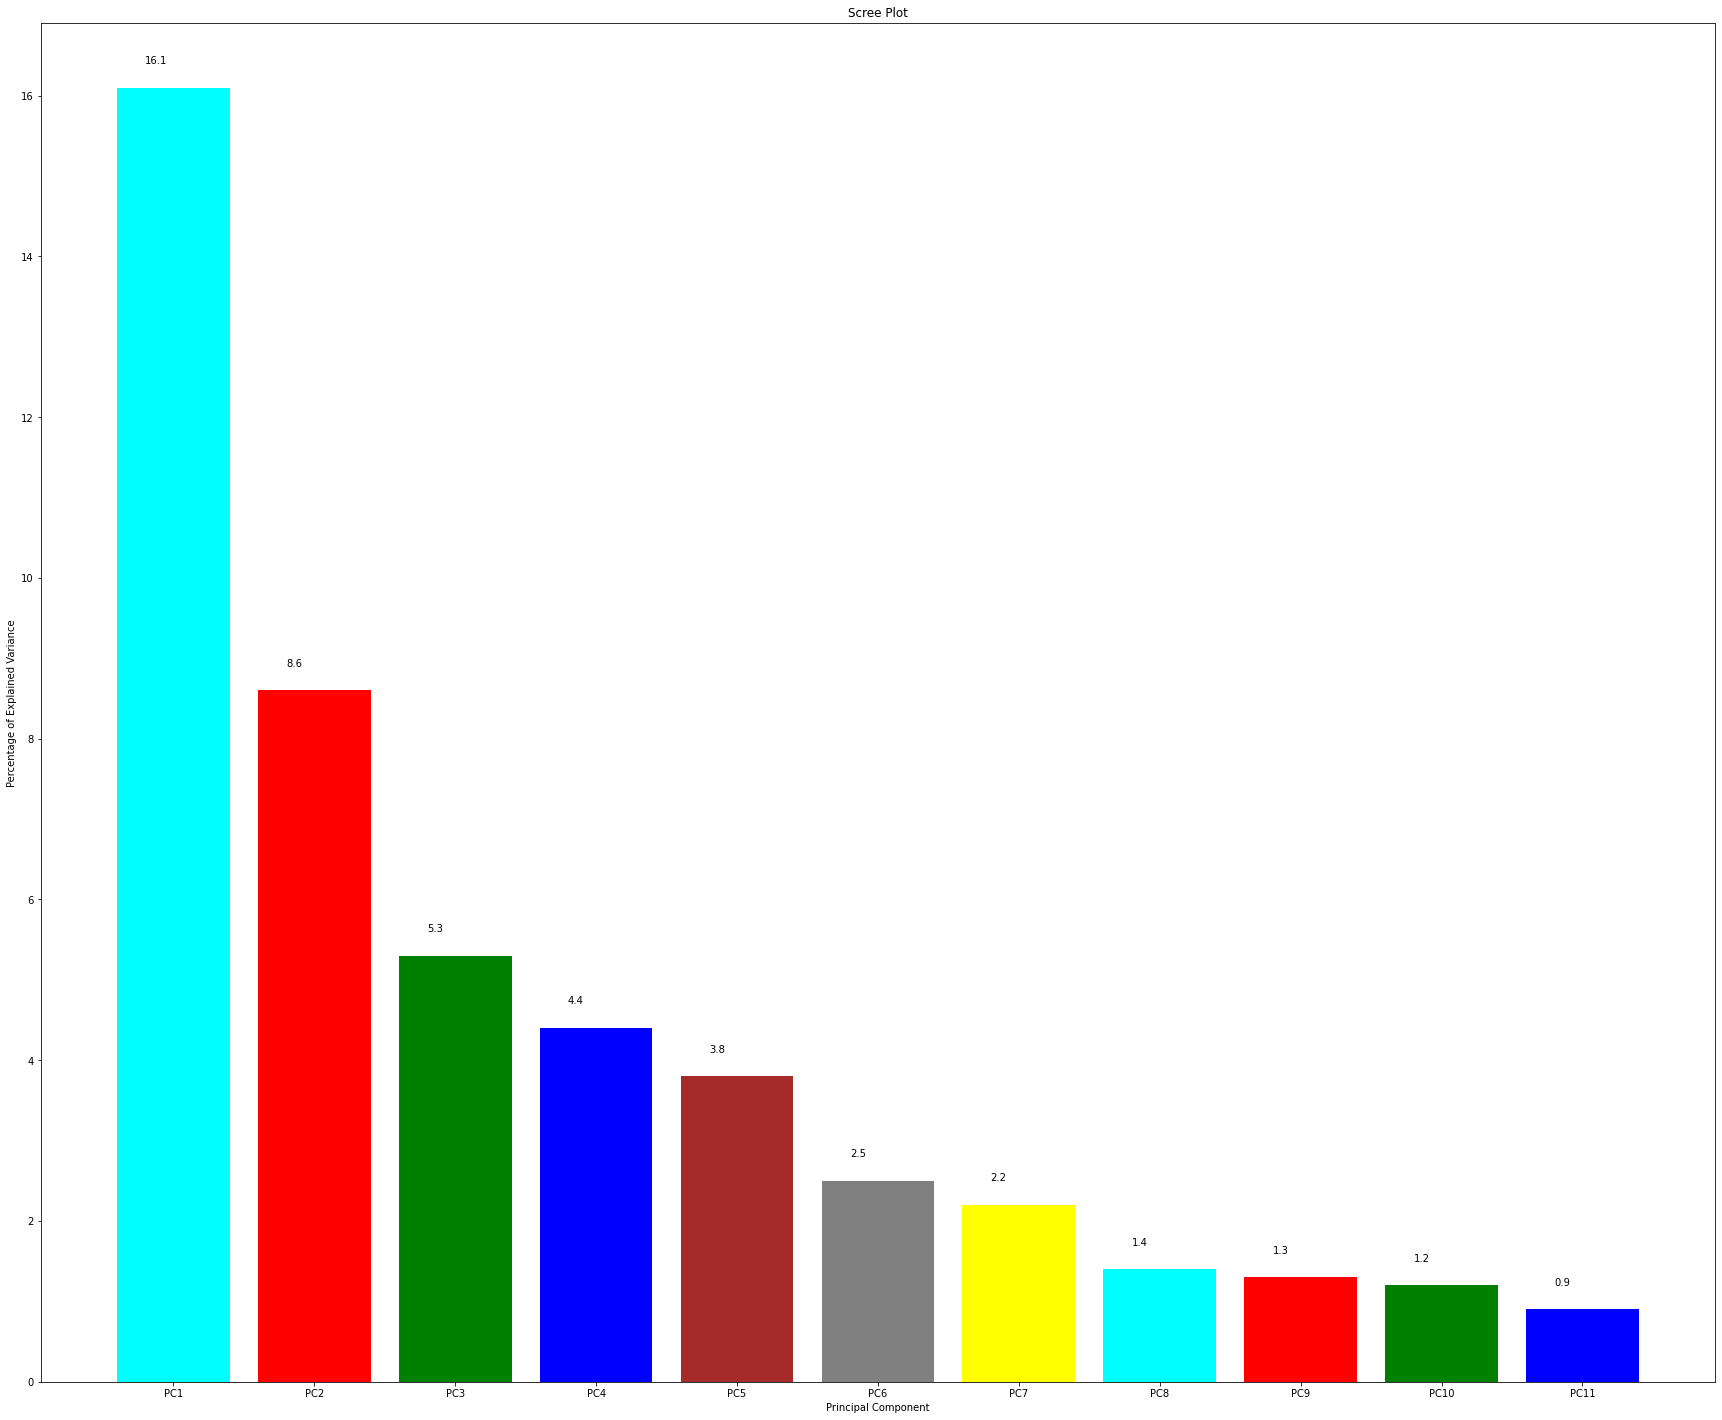

In [33]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
labels = ['PC' + str(x)for x in range (1, len (per_var) +1)]

x=range(1, len(per_var)+1)
y=per_var
xlocs, xlabs = plt.xticks()

plt.bar (x=range(1, len(per_var)+1), height=per_var, tick_label=labels, color=['cyan', 'red', 'green', 'blue', 'brown', 'grey', 'yellow'])
plt.ylabel ('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title ('Scree Plot')
xlocs=[i+1 for i in range(0,11)]
xlabs=labels
plt.xticks(xlocs, xlabs)
for i, v in enumerate(y):
    plt.text(xlocs[i] - 0.2, v + 0.3, str(v))

plt.rcParams["figure.figsize"] = [30,25]

plt.show()

In [35]:
pca = PCA(n_components=0.9)
pca.fit(df_scaled)
pca_data = pca.transform (df_scaled)

In [37]:
pca_data.shape

(457, 318)